### Step 1: Data Import and Exploration

##### **{Solar Energy Generation Data}**

In [15]:
import pandas as pd
#
energy_df =pd.read_csv('/Users/tovi/Documents/texas-renewables-analysis/clean_data/ercot_historical_solar_generation_data.csv')
energy_df.head()

,timestamp,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,solar_southeast,solar_centereast
0,2022-06-29 01:00:00,0.20,0.0,0.0,0.0,0.1,0.0,0.10
1,2022-06-29 02:00:00,0.19,0.0,0.0,0.0,0.1,0.0,0.09
2,2022-06-29 03:00:00,0.10,0.0,0.0,0.0,0.1,0.0,0.00
3,2022-06-29 04:00:00,0.10,0.0,0.0,0.0,0.1,0.0,0.00
4,2022-06-29 05:00:00,0.10,0.0,0.0,0.0,0.1,0.0,0.00


In [16]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         12743 non-null  object 
 1   solar_system      12739 non-null  float64
 2   solar_centerwest  12739 non-null  float64
 3   solar_northwest   12739 non-null  float64
 4   solar_farwest     12739 non-null  float64
 5   solar_fareast     12739 non-null  float64
 6   solar_southeast   12739 non-null  float64
 7   solar_centereast  12739 non-null  float64
dtypes: float64(7), object(1)
memory usage: 796.6+ KB


In [17]:
energy_df.describe()

,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,solar_southeast,solar_centereast
count,12739.000000,12739.000000,12739.000000,12739.000000,12739.000000,12739.000000,12739.000000
mean,3441.211389,628.069239,119.806256,1216.796427,932.071108,225.620721,318.847640
std,4310.458397,814.274688,167.970070,1544.694694,1249.438518,292.576063,437.889514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260000,0.000000,0.000000,0.010000,0.170000,0.000000,0.020000
50%,237.300000,24.070000,3.420000,61.650000,33.060000,8.330000,11.770000
75%,7333.030000,1378.290000,254.245000,2748.620000,1865.445000,484.840000,557.695000
max,17893.340000,3581.420000,827.200000,4426.930000,5611.480000,1654.630000,2379.260000


##### **{Hourly Temperature Data}**

In [18]:
temp_df = pd.read_csv('/Users/tovi/Documents/texas-renewables-analysis/clean_data/era5_wind_conditions_data.csv')
temp_df.head()

,time,number,temp_2m_south,wind_u_100m_south,wind_v_100m_south,number.1,temp_2m_north,wind_u_100m_north,wind_v_100m_north,number.2,temp_2m_east,wind_u_100m_east,wind_v_100m_east,number.3,temp_2m_west,wind_u_100m_west,wind_v_100m_west
0,2021-01-01 00:00:00,0,280.44113,8.874052,-4.125525,0,275.47700,-0.758140,-8.064275,0,285.33070,8.095841,5.828926,0,274.88324,3.239945,-4.025888
1,2021-01-01 01:00:00,0,280.06485,8.833785,-4.142875,0,275.49615,-0.381892,-7.454720,0,284.06274,9.073054,5.087430,0,274.58267,3.051376,-3.864054
2,2021-01-01 02:00:00,0,279.50992,8.720156,-3.938205,0,275.44696,0.146601,-6.802784,0,282.77908,8.665540,4.598661,0,273.86377,2.987516,-3.852034
3,2021-01-01 03:00:00,0,278.65192,8.357309,-3.723078,0,275.24594,0.887693,-6.319172,0,281.25110,7.918151,4.829106,0,273.21588,2.977859,-3.923165
4,2021-01-01 04:00:00,0,278.41907,8.048112,-3.574828,0,275.12744,1.753668,-5.496035,0,280.96722,8.195437,5.092289,0,272.90448,3.114550,-3.790921


In [19]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               26280 non-null  object 
 1   number             26280 non-null  int64  
 2   temp_2m_south      26280 non-null  float64
 3   wind_u_100m_south  26280 non-null  float64
 4   wind_v_100m_south  26280 non-null  float64
 5   number.1           26280 non-null  int64  
 6   temp_2m_north      26280 non-null  float64
 7   wind_u_100m_north  26280 non-null  float64
 8   wind_v_100m_north  26280 non-null  float64
 9   number.2           26280 non-null  int64  
 10  temp_2m_east       26280 non-null  float64
 11  wind_u_100m_east   26280 non-null  float64
 12  wind_v_100m_east   26280 non-null  float64
 13  number.3           26280 non-null  int64  
 14  temp_2m_west       26280 non-null  float64
 15  wind_u_100m_west   26280 non-null  float64
 16  wind_v_100m_west   262

In [20]:
temp_df.describe()

,number,temp_2m_south,wind_u_100m_south,wind_v_100m_south,number.1,temp_2m_north,wind_u_100m_north,wind_v_100m_north,number.2,temp_2m_east,wind_u_100m_east,wind_v_100m_east,number.3,temp_2m_west,wind_u_100m_west,wind_v_100m_west
count,26280.0,26280.000000,26280.000000,26280.000000,26280.0,26280.000000,26280.000000,26280.000000,26280.0,26280.000000,26280.000000,26280.000000,26280.0,26280.000000,26280.000000,26280.000000
mean,0.0,295.679664,-2.109953,2.173721,0.0,292.678974,-0.299001,2.246374,0.0,294.631132,-0.841990,1.669388,0.0,292.518427,-0.370053,2.204765
std,0.0,7.877425,2.338760,4.299740,0.0,10.129044,2.915414,5.036877,0.0,7.734087,2.863451,4.636936,0.0,9.705829,3.351205,3.734443
min,0.0,264.869140,-9.295389,-13.509977,0.0,256.117000,-8.076406,-14.575628,0.0,262.965730,-12.233512,-13.594587,0.0,258.484900,-10.449115,-12.672094
25%,0.0,290.501768,-3.742505,-0.277738,0.0,285.552590,-2.368521,-1.214056,0.0,289.654238,-2.805618,-1.454300,0.0,285.467175,-2.789593,-0.064723
50%,0.0,296.874910,-2.251874,2.963160,0.0,293.721800,-0.530872,2.807790,0.0,295.956560,-0.949976,2.313971,0.0,293.457885,-0.773695,2.756597
75%,0.0,301.262848,-0.739637,5.361281,0.0,300.208215,1.532718,6.036946,0.0,300.218872,0.990808,5.184723,0.0,299.840105,1.609088,4.875922
max,0.0,312.407530,9.091810,12.066953,0.0,315.514160,12.187036,15.145892,0.0,313.501130,13.093611,14.176582,0.0,314.362730,13.988998,13.009392


##### **{Hourly Load By Region Data}**

In [21]:
load_df = pd.read_csv('/Users/tovi/Documents/texas-renewables-analysis/clean_data/ercot_grid_load_data.csv')
load_df.head()

,timestamp,coast,east,farwest,north,northcentral,south,southcentral,west,system
0,2021-01-01 00:00:00,"11,047.02","1,517.44","3,978.22",838.35,"13,575.28","3,545.09","7,778.26","1,440.19","43,719.85"
1,2021-01-01 01:00:00,"10,954.47","1,523.68","3,975.76",825.12,"13,340.34","3,586.55","7,693.74","1,421.39","43,321.05"
2,2021-01-01 02:00:00,"10,883.66","1,519.80","3,969.81",819.55,"13,311.63","3,586.12","7,566.95","1,405.54","43,063.07"
3,2021-01-01 03:00:00,"10,926.48","1,523.47","3,983.49",820.61,"13,356.44","3,570.59","7,506.69","1,402.28","43,090.06"
4,2021-01-01 04:00:00,"11,019.80","1,565.63","3,980.94",831.61,"13,528.65","3,590.90","7,563.97","1,405.09","43,486.59"


In [22]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     26280 non-null  object
 1   coast         26280 non-null  object
 2   east          26280 non-null  object
 3   farwest       26280 non-null  object
 4   north         26280 non-null  object
 5   northcentral  26280 non-null  object
 6   south         26280 non-null  object
 7   southcentral  26280 non-null  object
 8   west          26280 non-null  object
 9   system        26280 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [23]:
load_df.describe()

,timestamp,coast,east,farwest,north,northcentral,south,southcentral,west,system
count,26280,26280,26280,26280,26280,26280,26280,26280,26280,26280
unique,26277,25905,23716,25014,22870,25964,25197,25743,22210,26168
top,2021-11-07 01:00:00,"11,892.45","1,557.84","4,235.17",994.07,"12,257.86","3,536.00","7,455.25","1,098.02","37,286.27"
freq,2,3,4,4,5,3,4,3,6,2


### Step 2: Data Cleaning

##### **{Hourly Solar Energy Generation Data}**

In [24]:
# checking for dupicates and null values
print (f'Number of duplicates: {energy_df.duplicated().sum()}')
print (f'Number of null values: {energy_df.isnull().sum()}')

Number of duplicates: 120
Number of null values: timestamp           0
solar_system        4
solar_centerwest    4
solar_northwest     4
solar_farwest       4
solar_fareast       4
solar_southeast     4
solar_centereast    4
dtype: int64


In [25]:
# dropping duplicate and null values
energy_df = energy_df.dropna()
energy_df = energy_df.drop_duplicates()

In [26]:
# changing timestamp column to datetime format
energy_df['timestamp'] = pd.to_datetime(energy_df['timestamp'])

In [27]:
# saving new csv file
energy_df.to_csv('/Users/tovi/Documents/solar_data_converted.csv', index=False)

##### **{Hourly Temperature Data}**

In [28]:
# checking for dupicates and null values
print (f'Number of duplicates: {temp_df.duplicated().sum()}')
print (f'Number of null values: {temp_df.isnull().sum()}')

Number of duplicates: 0
Number of null values: time                 0
number               0
temp_2m_south        0
wind_u_100m_south    0
wind_v_100m_south    0
number.1             0
temp_2m_north        0
wind_u_100m_north    0
wind_v_100m_north    0
number.2             0
temp_2m_east         0
wind_u_100m_east     0
wind_v_100m_east     0
number.3             0
temp_2m_west         0
wind_u_100m_west     0
wind_v_100m_west     0
dtype: int64


In [29]:
# changing time column to datetime format
temp_df['time'] = pd.to_datetime(temp_df['time'])

In [30]:
# keeping only time and temperature columns
columns_to_drop = ['number', 'wind_u_100m_south', 'wind_v_100m_south', 'number.1', 'wind_u_100m_north', 'wind_v_100m_north', 'number.2', 'wind_u_100m_east', 'wind_v_100m_east', 'number.3', 'wind_u_100m_west', 'wind_v_100m_west']
temp_df_dropped = temp_df.drop(columns=columns_to_drop, axis=1)
temp_df_dropped.head()

,time,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west
0,2021-01-01 00:00:00,280.44113,275.47700,285.33070,274.88324
1,2021-01-01 01:00:00,280.06485,275.49615,284.06274,274.58267
2,2021-01-01 02:00:00,279.50992,275.44696,282.77908,273.86377
3,2021-01-01 03:00:00,278.65192,275.24594,281.25110,273.21588
4,2021-01-01 04:00:00,278.41907,275.12744,280.96722,272.90448


In [31]:
# list temperature columns to convert
temp_columns = ['temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west']

# convert from kelvin to celsius
temp_df_dropped[temp_columns] = temp_df_dropped[temp_columns] - 273.15

# converting from celcius to fahrenheit
temp_df_dropped[temp_columns] = (temp_df_dropped[temp_columns] * 9/5) + 32
temp_df_dropped.head()

,time,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west
0,2021-01-01 00:00:00,45.124034,36.188600,53.925260,35.119832
1,2021-01-01 01:00:00,44.446730,36.223070,51.642932,34.578806
2,2021-01-01 02:00:00,43.447856,36.134528,49.332344,33.284786
3,2021-01-01 03:00:00,41.903456,35.772692,46.581980,32.118584
4,2021-01-01 04:00:00,41.484326,35.559392,46.070996,31.558064


In [32]:
# saving new csv file
temp_df_dropped.to_csv('/Users/tovi/Documents/temp_data_converted.csv', index=False)

##### **{Hourly Load By Region Data}**

In [33]:
# checking for dupicates and null values
print (f'Number of duplicates: {load_df.duplicated().sum()}')
print (f'Number of null values: {load_df.isnull().sum()}')

Number of duplicates: 0
Number of null values: timestamp       0
coast           0
east            0
farwest         0
north           0
northcentral    0
south           0
southcentral    0
west            0
system          0
dtype: int64


In [34]:
# changing timestamp column to datetime format
load_df['timestamp'] = pd.to_datetime(load_df['timestamp'])

In [35]:
#dropping commas for data consistency
load_df = load_df.replace({',' : ''}, regex=True)

In [36]:
# saving new csv file
load_df.to_csv('/Users/tovi/Documents/load_data_converted.csv', index=False)

### Step 3: Joining Files using SQL

The first step is to create tables that will properly hold our converted data and upload the individual CSV files. Below is SQL documentaion for how the tables were created and eventually joined to produce a single file containing all relevant values to be used for analysis.

In [37]:
"""
CREATE TABLE solar_generation_data (timestamp TIMESTAMP NOT NULL,
									solar_system DECIMAL,
									solar_centerwest DECIMAL,
									solar_northwest DECIMAL,
									solar_farwest DECIMAL,
									solar_fareast DECIMAL,
									solar_southeast DECIMAL,
									solar_centereast DECIMAL
									);
"""

'\nCREATE TABLE solar_generation_data (timestamp TIMESTAMP NOT NULL,\n\t\t\t\t\t\t\t\t\tsolar_system DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_centerwest DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_northwest DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_farwest DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_fareast DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_southeast DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_centereast DECIMAL\n\t\t\t\t\t\t\t\t\t);\n'

In [38]:
"""
CREATE TABLE solar_temp_data (time TIMESTAMP NOT NULL,
							  temp_2m_south DECIMAL(5,2),
							  temp_2m_north DECIMAL (5,2),
							  temp_2m_east DECIMAL (5,2),
							  temp_2m_west DECIMAL (5,2)
							  );
"""

'\nCREATE TABLE solar_temp_data (time TIMESTAMP NOT NULL,\n\t\t\t\t\t\t\t  temp_2m_south DECIMAL(5,2),\n\t\t\t\t\t\t\t  temp_2m_north DECIMAL (5,2),\n\t\t\t\t\t\t\t  temp_2m_east DECIMAL (5,2),\n\t\t\t\t\t\t\t  temp_2m_west DECIMAL (5,2)\n\t\t\t\t\t\t\t  );\n'

In [39]:
"""
CREATE TABLE load_data (timestamp TIMESTAMP NOT NULL,
						coast_load DECIMAL(10,2),
						east_load DECIMAL(10,2),
						farwest_load DECIMAL(10,2),
						north_load DECIMAL(10,2),
						northcentral_load DECIMAL(10,2),
						south_load DECIMAL(10,2),
						southcentral_load DECIMAL(10,2),
						west_load DECIMAL(10,2),
						system_load DECIMAL(10,2)
						);
"""

'\nCREATE TABLE load_data (timestamp TIMESTAMP NOT NULL,\n\t\t\t\t\t\tcoast_load DECIMAL(10,2),\n\t\t\t\t\t\teast_load DECIMAL(10,2),\n\t\t\t\t\t\tfarwest_load DECIMAL(10,2),\n\t\t\t\t\t\tnorth_load DECIMAL(10,2),\n\t\t\t\t\t\tnorthcentral_load DECIMAL(10,2),\n\t\t\t\t\t\tsouth_load DECIMAL(10,2),\n\t\t\t\t\t\tsouthcentral_load DECIMAL(10,2),\n\t\t\t\t\t\twest_load DECIMAL(10,2),\n\t\t\t\t\t\tsystem_load DECIMAL(10,2)\n\t\t\t\t\t\t);\n'

After these tables were created, the converted solar energy, temperature, and hourly load files were uploaded into thier corresponding table via PGAdmin.

In [40]:
"""
SELECT solar_generation_data.timestamp, temp_2m_south, temp_2m_north, temp_2m_east, temp_2m_west, solar_system, solar_centerwest, solar_northwest, solar_farwest, solar_fareast, solar_southeast, solar_centereast, coast_load, east_load, farwest_load, north_load, northcentral_load, south_load, southcentral_load, west_load, system_load
FROM solar_generation_data
LEFT JOIN solar_temp_data
ON solar_generation_data.timestamp = solar_temp_data.time
LEFT JOIN load_data
ON solar_generation_data.timestamp = load_data.timestamp
ORDER BY solar_generation_data.timestamp;
"""

'\nSELECT solar_generation_data.timestamp, temp_2m_south, temp_2m_north, temp_2m_east, temp_2m_west, solar_system, solar_centerwest, solar_northwest, solar_farwest, solar_fareast, solar_southeast, solar_centereast, coast_load, east_load, farwest_load, north_load, northcentral_load, south_load, southcentral_load, west_load, system_load\nFROM solar_generation_data\nLEFT JOIN solar_temp_data\nON solar_generation_data.timestamp = solar_temp_data.time\nLEFT JOIN load_data\nON solar_generation_data.timestamp = load_data.timestamp\nORDER BY solar_generation_data.timestamp;\n'

This join returns all records in the solar_generation_data alongside the corresponding temperature and load values for each timestamp from the temperature and load tables. The resulting table was saved as a csv file under solar_data_combined.csv.

## **EDA:**

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# plotting comparing temperature vs load for each region
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Scatter plots for each region
sns.scatterplot(data=sdf, x='temp_2m_south', y='south_load', label='South', color='b')
sns.scatterplot(data=sdf, x='temp_2m_north', y='north_load', label='North', color='g')
sns.scatterplot(data=sdf, x='temp_2m_east', y='east_load', label='East', color='r')
sns.scatterplot(data=sdf, x='temp_2m_west', y='west_load', label='West', color='purple')

plt.title('Temperature vs Load for Each Region')
plt.xlabel('Temperature (°F)')
plt.ylabel('Load (MW)')
plt.legend()
plt.show()

NameError: name 'sdf' is not defined

<Figure size 1200x800 with 0 Axes>

In [572]:
# Create a copy of the original DataFrame to avoid modifying the original data
sdf_copy = sdf.copy()

# Calculate the average solar generation for the 'west' region using data from northwest, far west, and center west
sdf_copy['solar_west'] = sdf_copy[['solar_northwest', 'solar_farwest', 'solar_centerwest']].mean(axis=1)

# Assign solar generation from the southeast as the representative for the 'south' region
sdf_copy['solar_south'] = sdf_copy['solar_southeast']

# Calculate the average solar generation for the 'north' region using data from center east and center west
sdf_copy['solar_north'] = sdf_copy[['solar_centereast', 'solar_centerwest']].mean(axis=1)

# Assign solar generation from the far east as the representative for the 'east' region
sdf_copy['solar_east'] = sdf_copy['solar_fareast']

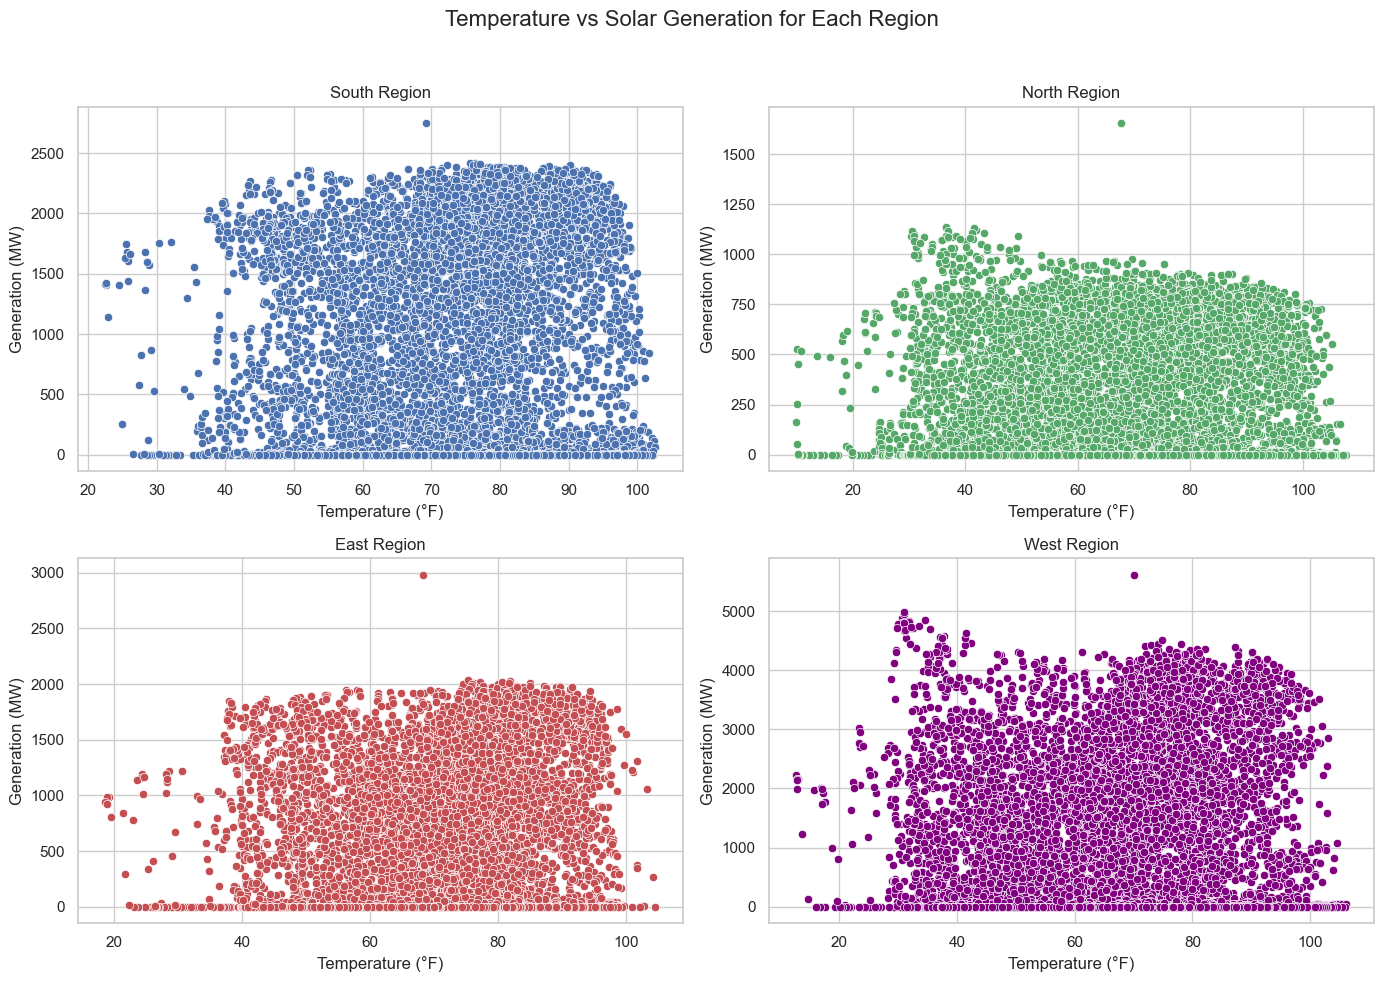

In [586]:
# set the aesthetic style of the plots
sns.set(style="whitegrid")

# create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # figsize defines the width and height of the entire figure
fig.suptitle('Temperature vs Solar Generation for Each Region', fontsize=16)  # Add a main title to the figure

# south Region Plot
sns.scatterplot(data=sdf_copy, x='temp_2m_south', y='solar_west', ax=axes[0, 0], color='b')  # Create scatter plot
axes[0, 0].set_title('South Region')  # Title for this subplot
axes[0, 0].set_xlabel('Temperature (°F)')  # X-axis label
axes[0, 0].set_ylabel('Generation (MW)')  # Y-axis label

# north Region Plot
sns.scatterplot(data=sdf_copy, x='temp_2m_north', y='solar_south', ax=axes[0, 1], color='g')
axes[0, 1].set_title('North Region')
axes[0, 1].set_xlabel('Temperature (°F)')
axes[0, 1].set_ylabel('Generation (MW)')

# east Region Plot
sns.scatterplot(data=sdf_copy, x='temp_2m_east', y='solar_north', ax=axes[1, 0], color='r')
axes[1, 0].set_title('East Region')
axes[1, 0].set_xlabel('Temperature (°F)')
axes[1, 0].set_ylabel('Generation (MW)')

# west Region Plot
sns.scatterplot(data=sdf_copy, x='temp_2m_west', y='solar_east', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('West Region')
axes[1, 1].set_xlabel('Temperature (°F)')
axes[1, 1].set_ylabel('Generation (MW)')

# automatically adjust subplot params so the subplot(s) fits in to the figure area
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leaves space at the top for the main title

plt.show()

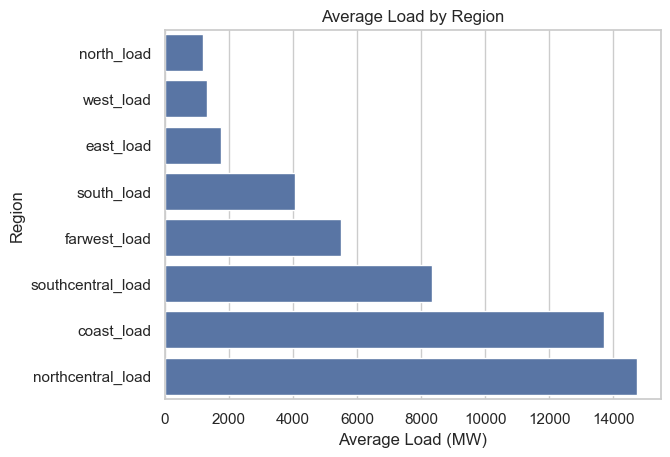

In [594]:
# define a list of columns that represent the load for each region
load_cols = ['coast_load', 'east_load', 'farwest_load', 'north_load',
             'northcentral_load', 'south_load', 'southcentral_load', 'west_load']

# calculate the mean (average) load for each region and sort them in ascending order
mean_loads = sdf_copy[load_cols].mean().sort_values()

# create a horizontal bar plot showing the average load for each region
sns.barplot(x=mean_loads.values, y=mean_loads.index)  # x=mean values, y=region names
plt.title('Average Load by Region')
plt.xlabel('Average Load (MW)')
plt.ylabel('Region')
plt.show()

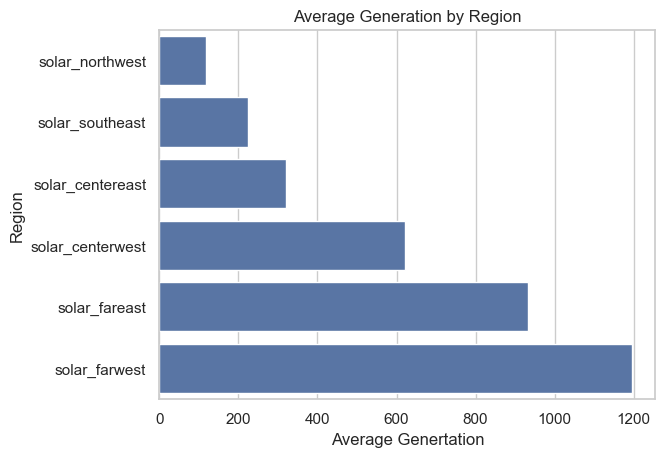

In [596]:
# define a list of columns that represent the load for each region
generation_cols = ['solar_centerwest', 'solar_northwest','solar_farwest', 
             'solar_fareast', 'solar_southeast', 'solar_centereast',]

# calculate the mean (average) load for each region and sort them in ascending order
mean_loads = sdf_copy[generation_cols].mean().sort_values()

# create a horizontal bar plot showing the average load for each region
sns.barplot(x=mean_loads.values, y=mean_loads.index)  # x=mean values, y=region names

# add a title to the plot
plt.title('Average Generation by Region')
plt.xlabel('Average Genertation')
plt.ylabel('Region')
plt.show()

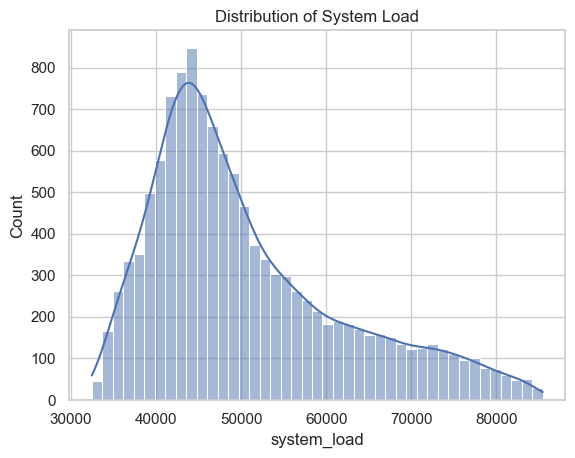

In [592]:
# histogram of the 'system_load' column with a KDE (density) curve
sns.histplot(data=sdf_copy, x='system_load', kde=True)

plt.title('Distribution of System Load')
plt.show()

## **Machine Learning:**

### Data Processing

In [202]:
# load merged csv from PGAdmin and save as DataFrame, remove quotes
solar_df = pd.read_csv('/Users/tovi/Downloads/solar_data_combined.csv', quotechar="'")
solar_df.head()

,timestamp,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,...,solar_centereast,coast_load,east_load,farwest_load,north_load,northcentral_load,south_load,southcentral_load,west_load,system_load
0,2022-06-29 01:00:00,85.11,86.26,87.33,85.23,0.20,0.0,0.0,0.0,0.1,...,0.10,13275.19,1519.27,4295.79,945.65,12947.00,3504.90,6645.97,1116.23,44249.99
1,2022-06-29 02:00:00,83.93,83.60,85.38,83.43,0.19,0.0,0.0,0.0,0.1,...,0.09,12819.07,1445.39,4272.60,905.64,12280.40,3369.22,6346.96,1076.51,42515.80
2,2022-06-29 03:00:00,79.99,79.54,83.44,78.31,0.10,0.0,0.0,0.0,0.1,...,0.00,12558.05,1385.83,4264.49,877.19,11810.40,3250.56,6192.21,1062.15,41400.88
3,2022-06-29 04:00:00,78.57,77.75,82.08,75.17,0.10,0.0,0.0,0.0,0.1,...,0.00,12511.43,1395.49,4271.19,867.73,11707.94,3220.94,6185.78,1047.69,41208.18
4,2022-06-29 05:00:00,77.99,75.69,80.16,74.42,0.10,0.0,0.0,0.0,0.1,...,0.00,12801.30,1415.30,4262.16,886.50,11985.19,3277.66,6304.09,1052.00,41984.20


In [204]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12745 entries, 0 to 12744
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          12745 non-null  object 
 1   temp_2m_south      12745 non-null  float64
 2   temp_2m_north      12745 non-null  float64
 3   temp_2m_east       12745 non-null  float64
 4   temp_2m_west       12745 non-null  float64
 5   solar_system       12740 non-null  float64
 6   solar_centerwest   12740 non-null  float64
 7   solar_northwest    12740 non-null  float64
 8   solar_farwest      12740 non-null  float64
 9   solar_fareast      12740 non-null  float64
 10  solar_southeast    12740 non-null  float64
 11  solar_centereast   12740 non-null  float64
 12  coast_load         12745 non-null  float64
 13  east_load          12745 non-null  float64
 14  farwest_load       12745 non-null  float64
 15  north_load         12745 non-null  float64
 16  northcentral_load  127

In [210]:
# converting timestamp back into datetime format
solar_df['timestamp'] = pd.to_datetime(solar_df['timestamp'])

In [212]:
# dropping any null or duplicate values
solar_df= solar_df.dropna(inplace=False)
solar_df = solar_df.drop_duplicates(inplace=False)

print (f'Number of duplicates: {solar_df.duplicated().sum()}')
print (f'Number of null values: {solar_df.isnull().sum()}')

Number of duplicates: 0
Number of null values: timestamp            0
temp_2m_south        0
temp_2m_north        0
temp_2m_east         0
temp_2m_west         0
solar_system         0
solar_centerwest     0
solar_northwest      0
solar_farwest        0
solar_fareast        0
solar_southeast      0
solar_centereast     0
coast_load           0
east_load            0
farwest_load         0
north_load           0
northcentral_load    0
south_load           0
southcentral_load    0
west_load            0
system_load          0
dtype: int64


In [214]:
# descriptive stats
solar_df.describe()

,timestamp,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,...,solar_centereast,coast_load,east_load,farwest_load,north_load,northcentral_load,south_load,southcentral_load,west_load,system_load
count,12620,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000,...,12620.000000,12620.000000,12620.000000,12620.000000,12620.00000,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000
mean,2023-04-07 02:11:21.774960128,74.201990,69.572622,72.391288,68.679116,3437.610261,627.482865,119.754820,1214.548162,932.269650,...,318.156124,13806.638431,1783.007021,5491.115303,1194.82388,14933.924457,4082.185536,8433.165079,1322.318923,51047.178592
min,2022-06-29 01:00:00,22.510000,9.940000,18.620000,12.720000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7889.550000,1000.410000,4262.160000,696.40000,8232.240000,2404.320000,4759.220000,735.790000,32443.170000
25%,2022-11-12 13:45:00,64.345000,56.000000,63.280000,55.310000,0.260000,0.000000,0.000000,0.010000,0.170000,...,0.020000,11305.182500,1446.565000,5123.512500,995.34000,11819.982500,3323.045000,6774.480000,1121.550000,42598.447500
50%,2023-04-13 01:30:00,76.320000,71.430000,74.590000,70.370000,230.120000,23.620000,3.320000,60.215000,32.750000,...,11.620000,12921.530000,1661.430000,5473.940000,1125.08500,13657.210000,3870.240000,7800.620000,1244.600000,47705.390000
75%,2023-08-22 13:15:00,84.232500,83.252500,82.422500,82.000000,7325.500000,1375.942500,253.717500,2743.450000,1863.792500,...,556.335000,15763.695000,2027.602500,5882.807500,1327.59000,17154.862500,4714.992500,9670.225000,1455.280000,57401.917500
max,2023-12-31 23:00:00,102.660000,108.260000,104.630000,106.180000,17893.340000,3581.420000,827.200000,4426.930000,5611.480000,...,2379.260000,23963.420000,3272.490000,6639.790000,2104.58000,28312.540000,6608.060000,15174.030000,2194.770000,85464.120000
std,NaN,14.166947,18.348918,13.925766,17.528490,4310.320826,814.274559,168.078276,1542.443431,1250.609703,...,437.721502,3285.010121,464.447895,465.676476,278.52270,4343.178291,953.210711,2222.304887,278.297072,11600.692296


### Feature Engineering

In [234]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [299]:
sdf = solar_df
# get time-based features
sdf["hour"] = sdf["timestamp"].dt.hour
sdf["dayofweek"] = sdf["timestamp"].dt.dayofweek
sdf["month"] = sdf["timestamp"].dt.month
sdf["is_weekend"] = sdf["dayofweek"].isin([5, 6]).astype(int)

# lags for target
lags = [1, 2, 3, 24, 48, 168]
for lag in lags:
    sdf[f"lag_{lag}"] = sdf["solar_system"].shift(lag)

# rolling features
sdf["rolling_mean_6"] = sdf["solar_system"].shift(1).rolling(window=6).mean()
sdf["rolling_std_6"] = sdf["solar_system"].shift(1).rolling(window=6).std()

# temperature columns
temp_features = ["temp_2m_south", "temp_2m_north", "temp_2m_east", "temp_2m_west"]

# load columns
load_features = [
    "coast_load", "east_load", "farwest_load", "north_load", "northcentral_load",
    "south_load", "southcentral_load", "west_load", "system_load"
]

# Drop rows with NaNs created by lag/rolling features
sdf = sdf.dropna().reset_index(drop=True)

# sort by time (just in case)
sdf = sdf.sort_values('timestamp')

time_features = ["hour", "dayofweek", "month", "is_weekend"]
lag_features = [f"lag_{lag}" for lag in lags]
rolling_features = ["rolling_mean_6", "rolling_std_6"]

features = time_features + lag_features + rolling_features + temp_features + load_features

### Feature Importance Analysis

#### **GradientBoostingRegressor**

##### **{Training}**

In [303]:
gbX = sdf[features]
gby = sdf["solar_system"]

# Time-based split
split_idx = int(len(sdf) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Model training
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Prediction
y_pred = gb_model.predict(X_test)

In [325]:
# evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Gradient Boosting MAE: {mae:.2f}")
print(f"Gradient Boosing RMSE: {rmse:.2f}")

Gradient Boosting MAE: 361.11
Gradient Boosing RMSE: 683.03


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### **{Get Feature Importances}**

In [341]:
# get importances and sort
importances = gb_model.feature_importances_
feature_names = gbX.columns
indices = np.argsort(importances)[::-1]

# top N features to display
top_n = 20
top_features = feature_names[indices[:top_n]]
top_importances = importances[indices[:top_n]]

In [309]:
# predict on test set
gb_preds = gb_model.predict(X_test)

# evaluate
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_rmse = mean_squared_error(y_test, gb_preds, squared=False)

print(f"Gradient Boosting MAE: {gb_mae:.2f}")
print(f"Gradient Boosting RMSE: {gb_rmse:.2f}")

Gradient Boosting MAE: 425.20
Gradient Boosting RMSE: 746.76


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


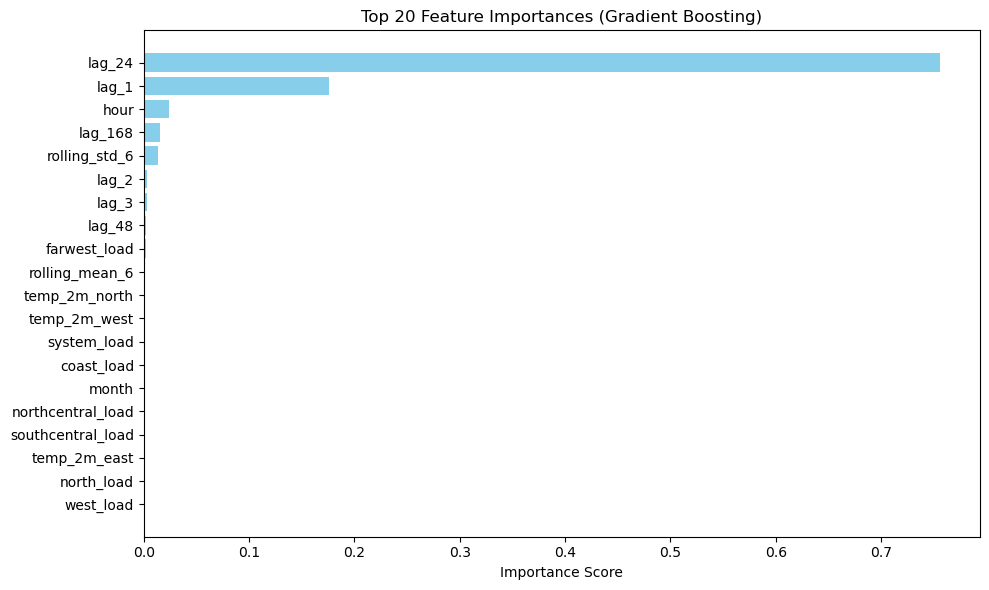

In [268]:
# plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importances[::-1], color="skyblue")
plt.xlabel("Importance Score")
plt.title(f"Top {top_n} Feature Importances (Gradient Boosting)")
plt.tight_layout()
plt.show()

#### **Permutation Importance (Gradient Boosting Regressor)**

In [343]:
from sklearn.inspection import permutation_importance

# run permutation importance on the GradientBoostingRegressor model
result = permutation_importance(
    gb_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error'
)

# extract values
perm_importances = result.importances_mean
perm_std = result.importances_std
feature_names = gbX.columns

# Sort by importance
indices = np.argsort(perm_importances)[::-1]

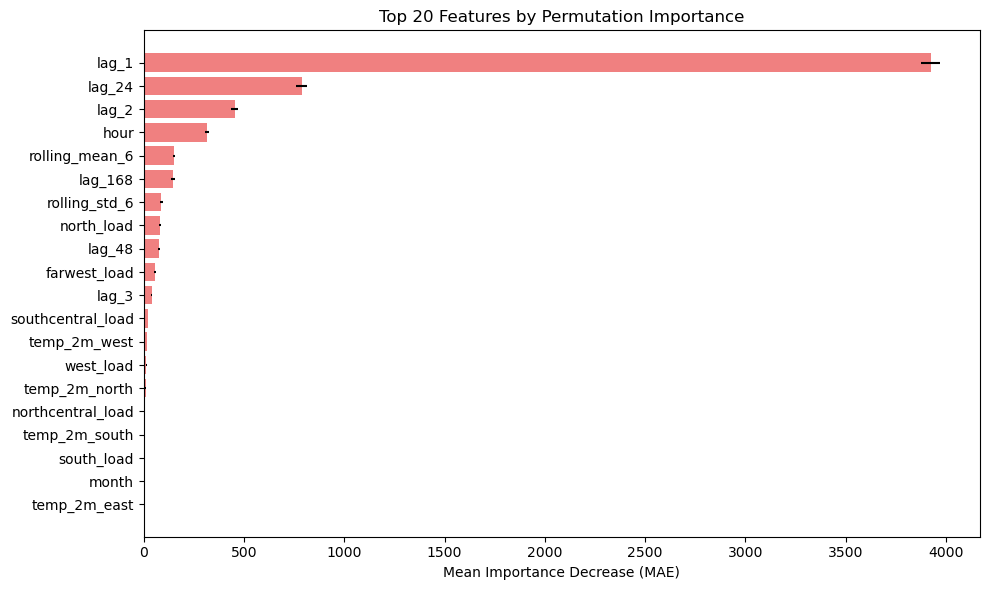

In [345]:
# plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices[:20]][::-1], perm_importances[indices[:20]][::-1],
         xerr=perm_std[indices[:20]][::-1], color="lightcoral")
plt.xlabel("Mean Importance Decrease (MAE)")
plt.title("Top 20 Features by Permutation Importance")
plt.tight_layout()
plt.show()

#### **XGBoost**

##### **{Training}**

In [349]:
# import libraries
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [351]:
# list features to include
feature_cols = [
    'hour', 'dayofweek', 'month', 'is_weekend',
    'lag_1', 'lag_2', 'lag_3', 'lag_24', 'lag_48', 'lag_168',
    'rolling_mean_6', 'rolling_std_6',
    'temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west',
    'coast_load', 'east_load', 'farwest_load', 'north_load',
    'northcentral_load', 'south_load', 'southcentral_load',
    'west_load', 'system_load'
]

xgX = sdf[feature_cols]
xgy = sdf['solar_system']

In [353]:
# train/test split (no shuffle because it's time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# initialize and train model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [355]:
# predict
y_pred = xgb_model.predict(X_test)

# evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Model Performance:")
print(f"MAE:  {mae:.2f} MW")
print(f"RMSE: {rmse:.2f} MW")
print(f"R²:   {r2:.4f}")

XGBoost Model Performance:
MAE:  361.11 MW
RMSE: 683.03 MW
R²:   0.9765


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### **{Get Feature Importances}**

In [358]:
# set up model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# train
xgb_model.fit(X_train, y_train)

# predict
xgb_preds = xgb_model.predict(X_test)

# evaluate
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
print(f"XGBoost MAE: {xgb_mae:.2f}") 
print(f"RMSE: {xgb_rmse:.2f}")

XGBoost MAE: 361.11
RMSE: 683.03


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


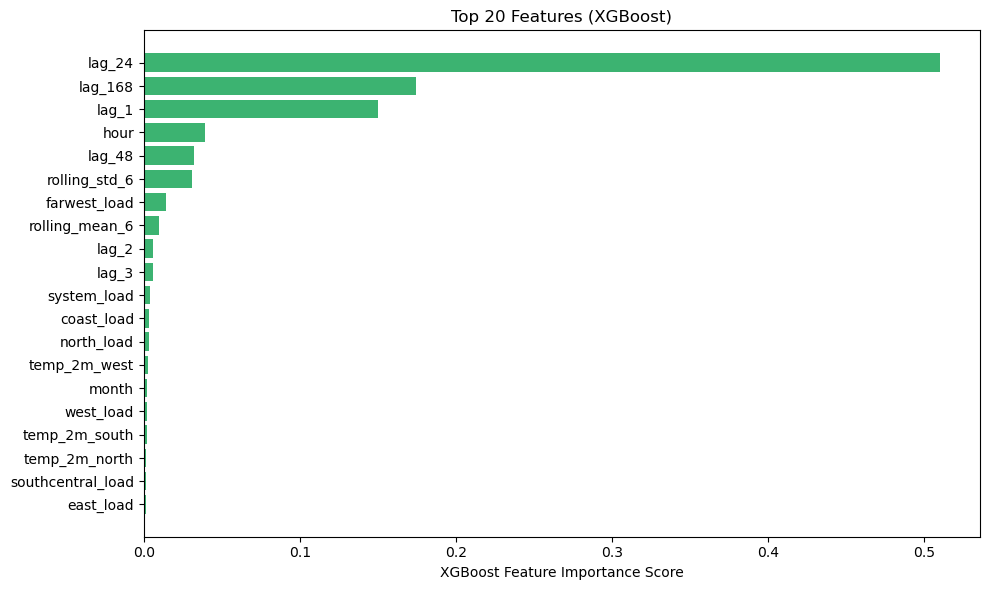

In [360]:
# plot
xgb_importances = xgb_model.feature_importances_
sorted_idx = xgb_importances.argsort()[::-1]
top_n = 20

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx[:top_n]][::-1], xgb_importances[sorted_idx[:top_n]][::-1], color="mediumseagreen")
plt.xlabel("XGBoost Feature Importance Score")
plt.title(f"Top {top_n} Features (XGBoost)")
plt.tight_layout()
plt.show()

#### **{Permutation Importance (XGBoost)}**

In [369]:
from sklearn.inspection import permutation_importance

# run permutation importance
perm_result = permutation_importance(
    xgb_model, 
    X_test, 
    y_test, 
    n_repeats=10,           # more repeats = more stable scores
    random_state=42,
    scoring='neg_mean_absolute_error'  # or use 'r2', 'neg_mean_squared_error'
)

In [370]:
# extract results
importances = perm_result.importances_mean
stds = perm_result.importances_std

# sort feature importances
indices = np.argsort(importances)[::-1]
sorted_features = np.array(feature_cols)[indices]

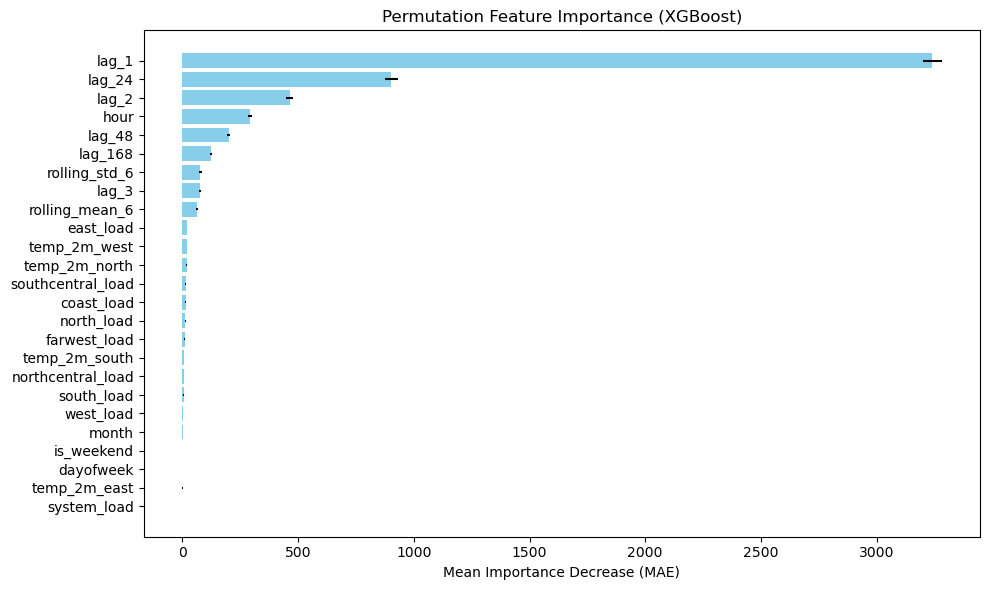

In [371]:
# plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, importances[indices], xerr=stds[indices], color='skyblue')
plt.xlabel("Mean Importance Decrease (MAE)")
plt.title("Permutation Feature Importance (XGBoost)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Running Permutation Importance using XGBoost ranks features differently beyond the top 3 and predicts less loss in MAE compared to the predictions made using the GradientBoostingRegressor.

### Recursive Forecasting

#### **Forecasting with GradientBoostingRegressor**

In [384]:
# Start with the last known row in the dataset
last_row = sdf.iloc[-1].copy()
forecast_horizon = 24  # hours ahead
predictions = []

# Keep a rolling window of previous rows for lag computation
sdf_forecast = sdf.copy()

for step in range(1, forecast_horizon + 1):
    # Create new row for the next hour
    new_row = {}

    # Timestamp forward
    new_row["timestamp"] = last_row["timestamp"] + pd.Timedelta(hours=1)
    new_row["hour"] = new_row["timestamp"].hour
    new_row["dayofweek"] = new_row["timestamp"].dayofweek
    new_row["month"] = new_row["timestamp"].month
    new_row["is_weekend"] = int(new_row["dayofweek"] in [5, 6])

    # Lag features (use previous predictions + real data)
    for lag in [1, 2, 3, 24, 48, 168]:
        if len(predictions) >= lag:
            new_row[f"lag_{lag}"] = predictions[-lag]
        else:
            new_row[f"lag_{lag}"] = sdf_forecast["solar_system"].iloc[-lag]

    # Rolling features (simplified: mean/std of last 6 hours)
    last_values = list(sdf_forecast["solar_system"].values[-6:]) + predictions[-6:]
    last_values = last_values[-6:]  # ensure window size = 6
    new_row["rolling_mean_6"] = np.mean(last_values)
    new_row["rolling_std_6"] = np.std(last_values)

    # Use latest known values for temp and load features (or forecasted if available)
    for col in ["temp_2m_south", "temp_2m_north", "temp_2m_east", "temp_2m_west",
                "coast_load", "east_load", "farwest_load", "north_load", "northcentral_load",
                "south_load", "southcentral_load", "west_load", "system_load"]:
        new_row[col] = last_row[col]

    # Convert to DataFrame and predict
    new_df = pd.DataFrame([new_row])
    X_new = new_df[X.columns]  # Ensure same order
    y_pred = gb_model.predict(X_new)[0]

    # Save prediction
    predictions.append(y_pred)

    # Update last_row and sdf_forecast
    last_row = new_df.iloc[0].copy()
    last_row["solar_system"] = y_pred
    sdf_forecast = pd.concat([sdf_forecast, pd.DataFrame([last_row])], ignore_index=True)

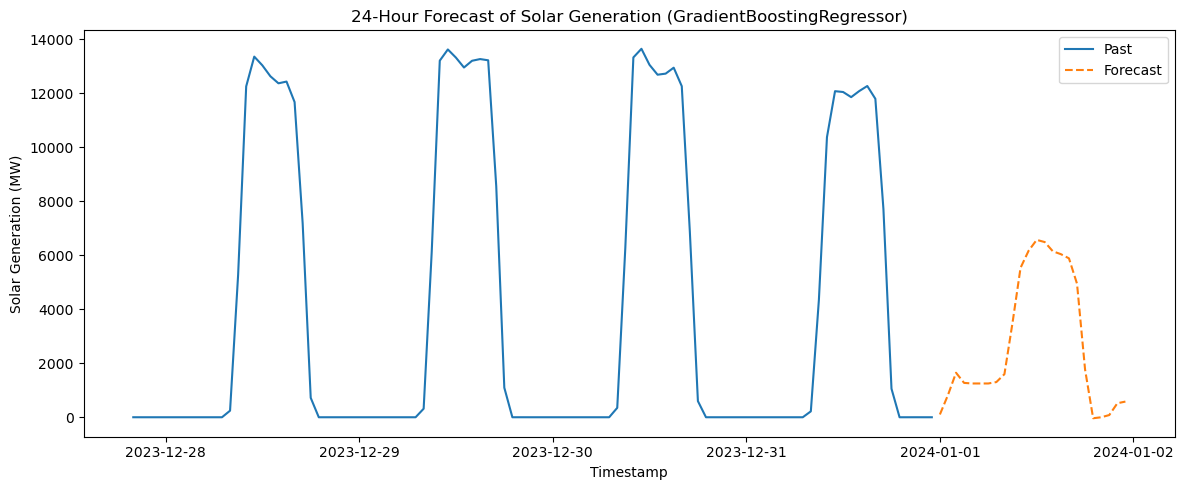

In [386]:
# plot
future_timestamps = [sdf["timestamp"].iloc[-1] + pd.Timedelta(hours=i) for i in range(1, forecast_horizon + 1)]

plt.figure(figsize=(12, 5))
plt.plot(sdf["timestamp"].iloc[-100:], sdf["solar_system"].iloc[-100:], label="Past")
plt.plot(future_timestamps, predictions, label="Forecast", linestyle="--")
plt.xlabel("Timestamp")
plt.ylabel("Solar Generation (MW)")
plt.title("24-Hour Forecast of Solar Generation (GradientBoostingRegressor)")
plt.legend()
plt.tight_layout()
plt.show()

#### **Forecasting with XGBoost**

In [409]:
# list features you used during training
feature_cols = [
    'hour', 'dayofweek', 'month', 'is_weekend',
    'lag_1', 'lag_2', 'lag_3', 'lag_24', 'lag_48', 'lag_168',
    'rolling_mean_6', 'rolling_std_6',
    'temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west',
    'coast_load', 'east_load', 'farwest_load', 'north_load',
    'northcentral_load', 'south_load', 'southcentral_load',
    'west_load', 'system_load'
]

forecast_df = pd.DataFrame({
    "timestamp": timestamps,
    "predicted_solar": predictions
})

In [411]:
# forecast 24 hours ahead
forecast_horizon = 24
predictions = []
timestamps = []

# Start from last known data row
last_row = sdf.iloc[-1].copy()
sdf_forecast = sdf.copy()

for step in range(1, forecast_horizon + 1):
    new_timestamp = last_row["timestamp"] + pd.Timedelta(hours=1)

    new_row = {
        "timestamp": new_timestamp,
        "hour": new_timestamp.hour,
        "dayofweek": new_timestamp.dayofweek,
        "month": new_timestamp.month,
        "is_weekend": int(new_timestamp.dayofweek in [5, 6])
    }

    # Lag features
    for lag in [1, 2, 3, 24, 48, 168]:
        if len(predictions) >= lag:
            new_row[f"lag_{lag}"] = predictions[-lag]
        else:
            new_row[f"lag_{lag}"] = sdf_forecast["solar_system"].iloc[-lag]

    # Get recent values from actual + predicted solar_system values
    recent_actuals = list(sdf_forecast["solar_system"].values[-6:])
    recent_preds = predictions[-6:]

    # Combine and keep last 6 values
    combined_vals = recent_actuals + recent_preds
    combined_vals = combined_vals[-6:]  # always take the last 6

    # Now compute rolling features safely
    new_row["rolling_mean_6"] = np.mean(combined_vals)
    new_row["rolling_std_6"] = np.std(combined_vals)

    # Rolling features from recent history
    #recent_vals = list(sdf_forecast["solar_system"].values[-6:] + predictions[-6:])
    #recent_vals = recent_vals[-6:]
    #new_row["rolling_mean_6"] = np.mean(recent_vals)
    #new_row["rolling_std_6"] = np.std(recent_vals)

    # Use latest known values for temp and load features (or forecasted if available)
    for col in ["temp_2m_south", "temp_2m_north", "temp_2m_east", "temp_2m_west",
                "coast_load", "east_load", "farwest_load", "north_load", "northcentral_load",
                "south_load", "southcentral_load", "west_load", "system_load"]:
        new_row[col] = last_row[col]

    # Prepare input for prediction
    X_input = pd.DataFrame([new_row])[feature_cols]
    y_pred = xgb_model.predict(X_input)[0]

    # Store prediction
    predictions.append(y_pred)
    timestamps.append(new_timestamp)

    # Update last_row for next iteration
    last_row = pd.Series(new_row)
    last_row["solar_system"] = y_pred
    sdf_forecast = pd.concat([sdf_forecast, pd.DataFrame([last_row])], ignore_index=True)

In [413]:
# predict
y_pred = xgb_model.predict(X_test)

# evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Model Performance:")
print(f"MAE:  {mae:.2f} MW")
print(f"RMSE: {rmse:.2f} MW")
print(f"R²:   {r2:.4f}")


XGBoost Model Performance:
MAE:  361.11 MW
RMSE: 683.03 MW
R²:   0.9765


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


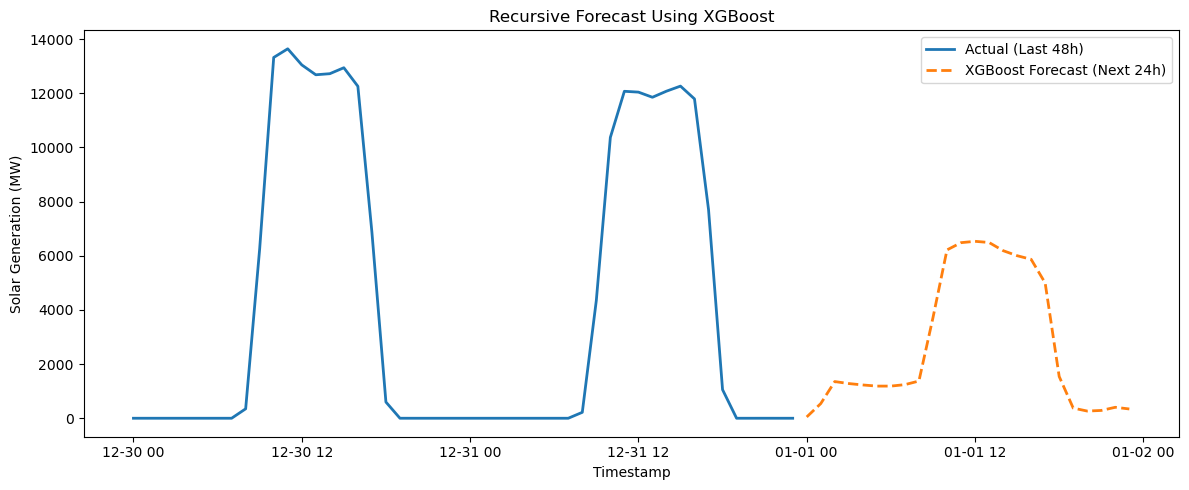

In [415]:
# plot the recursive forecastusing XGBoost model
import matplotlib.pyplot as plt

# Plot last 48 actual + next 24 predicted
plt.figure(figsize=(12, 5))

# Actual values from the last 48 hours
plt.plot(
    sdf["timestamp"].iloc[-48:], 
    sdf["solar_system"].iloc[-48:], 
    label="Actual (Last 48h)", 
    color='tab:blue', 
    linewidth=2
)

# Predicted values from XGBoost
plt.plot(
    forecast_df["timestamp"], 
    forecast_df["predicted_solar"], 
    label="XGBoost Forecast (Next 24h)", 
    color='tab:orange', 
    linestyle='--', 
    linewidth=2
)

# Chart styling
plt.title("Recursive Forecast Using XGBoost")
plt.xlabel("Timestamp")
plt.ylabel("Solar Generation (MW)")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

### Actual vs. Predicted

#### **GradientBoostingRegressor**

To avoid using a partial dataframe, I rebuilt the feature set first. The GBR Model was run before and returned an R-squared score of ~0.955. Rebuilding the pipeline from scratch helped avoid issues such as:
- Feature misalignment or leakage
- Inconsistent row indices or timestamp shifts
- Carryover artifacts from earlier steps

Ultimately, this increased the R-squared score as seen below.

In [476]:
# get time-based features
sdf["hour"] = sdf["timestamp"].dt.hour
sdf["dayofweek"] = sdf["timestamp"].dt.dayofweek
sdf["month"] = sdf["timestamp"].dt.month
sdf["is_weekend"] = sdf["dayofweek"].isin([5, 6]).astype(int)

# lags for target
lags = [1, 2, 3, 24, 48, 168]
for lag in lags:
    sdf[f"lag_{lag}"] = sdf["solar_system"].shift(lag)

# rolling features
sdf["rolling_mean_6"] = sdf["solar_system"].shift(1).rolling(window=6).mean()
sdf["rolling_std_6"] = sdf["solar_system"].shift(1).rolling(window=6).std()

# temperature columns
temp_features = ["temp_2m_south", "temp_2m_north", "temp_2m_east", "temp_2m_west"]

# load columns
load_features = [
    "coast_load", "east_load", "farwest_load", "north_load", "northcentral_load",
    "south_load", "southcentral_load", "west_load", "system_load"
]

# Drop rows with NaNs introduced by lag/rolling features
sdf = sdf.dropna()

time_features = ["hour", "dayofweek", "month", "is_weekend"]
lag_features = [f"lag_{lag}" for lag in lags]
rolling_features = ["rolling_mean_6", "rolling_std_6"]

features = time_features + lag_features + rolling_features + temp_features + load_features

X = sdf[features]
y = sdf["solar_system"]

# Time-based split
split_idx = int(len(sdf) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Model training
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Prediction
y_pred = gb_model.predict(X_test)

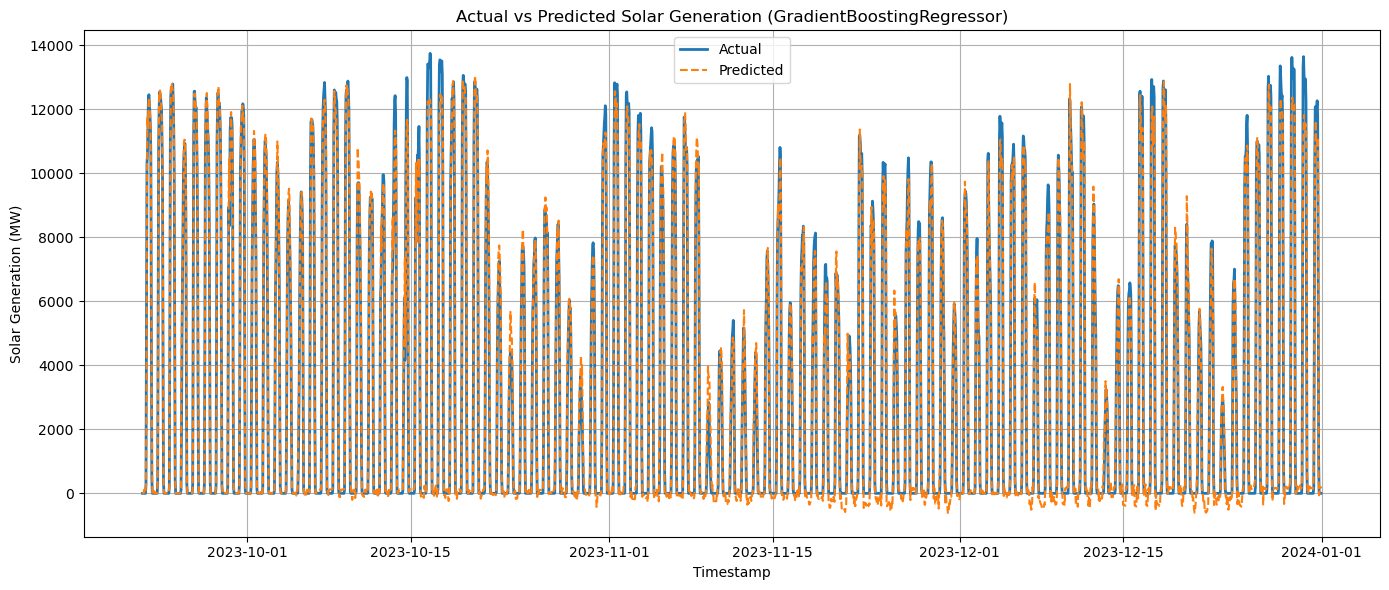

In [479]:
# predict
preds = gb_model.predict(X_test)

# create a DataFrame to align timestamps with predictions
results = pd.DataFrame({
    "timestamp": sdf.loc[X_test.index, "timestamp"],
    "actual": y_test,
    "predicted": preds
})

# sort by time for a clean line plot
results = results.sort_values("timestamp")

# plot
plt.figure(figsize=(14, 6))
plt.plot(results["timestamp"], results["actual"], label="Actual", linewidth=2)
plt.plot(results["timestamp"], results["predicted"], label="Predicted", linestyle="--")
plt.title("Actual vs Predicted Solar Generation (GradientBoostingRegressor)")
plt.xlabel("Timestamp")
plt.ylabel("Solar Generation (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [482]:
y_pred_gb = gb_model.predict(X_test)

# calculate performance metrics for Gradient Boosting Regressor
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Mean Absolute Error (MAE) for Gradient Boosting: {mae_gb:.4f}")
print(f"Root Mean Squared Error (RMSE) for Gradient Boosting: {rmse_gb:.4f}")
print(f"R-squared (R²) for Gradient Boosting: {r2_gb:.4f}")

Mean Absolute Error (MAE) for Gradient Boosting: 395.0029
Root Mean Squared Error (RMSE) for Gradient Boosting: 679.1359
R-squared (R²) for Gradient Boosting: 0.9764


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### **Linear Regression**

In [567]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = sdf[["hour", "temp_2m_south", "temp_2m_north", "temp_2m_east", "temp_2m_west", "coast_load", 
          "east_load", "farwest_load", "north_load", "northcentral_load", "south_load", "southcentral_load", 
          "west_load", "system_load", "lag_1", "lag_24"]]  # Include lagged features and other features
y = sdf["solar_system"]  # Target: solar generation in MW

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

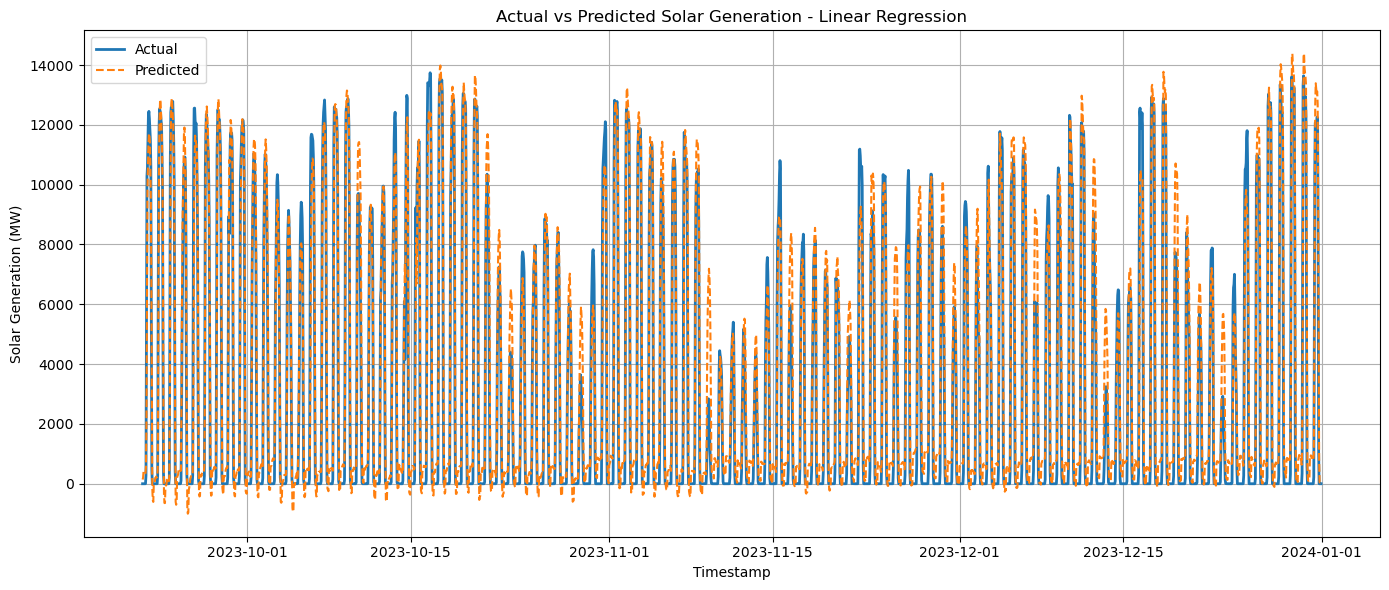

In [565]:
# Make predictions
y_pred = lr_model.predict(X_test)

# Create a DataFrame to align timestamps with predictions
results = pd.DataFrame({
    "timestamp": sdf.loc[X_test.index, "timestamp"],  # Align by timestamp from test set
    "actual": y_test,
    "predicted": y_pred
})

# Sort by time for a clean line plot
results = results.sort_values("timestamp")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(results["timestamp"], results["actual"], label="Actual", linewidth=2)
plt.plot(results["timestamp"], results["predicted"], label="Predicted", linestyle="--")
plt.title("Actual vs Predicted Solar Generation - Linear Regression")
plt.xlabel("Timestamp")
plt.ylabel("Solar Generation (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [561]:
# alculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 871.5948
Root Mean Squared Error (RMSE): 1248.2732
R-squared (R²): 0.9203


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### **Residuals**

Residuals are the differences between the actual and predicted values. This gives insight into whether the model systematically underperforms at certain times (e.g., systematically predicting too high or too low). If the residuals are randomly distributed around zero, it indicates that the model is unbiased.

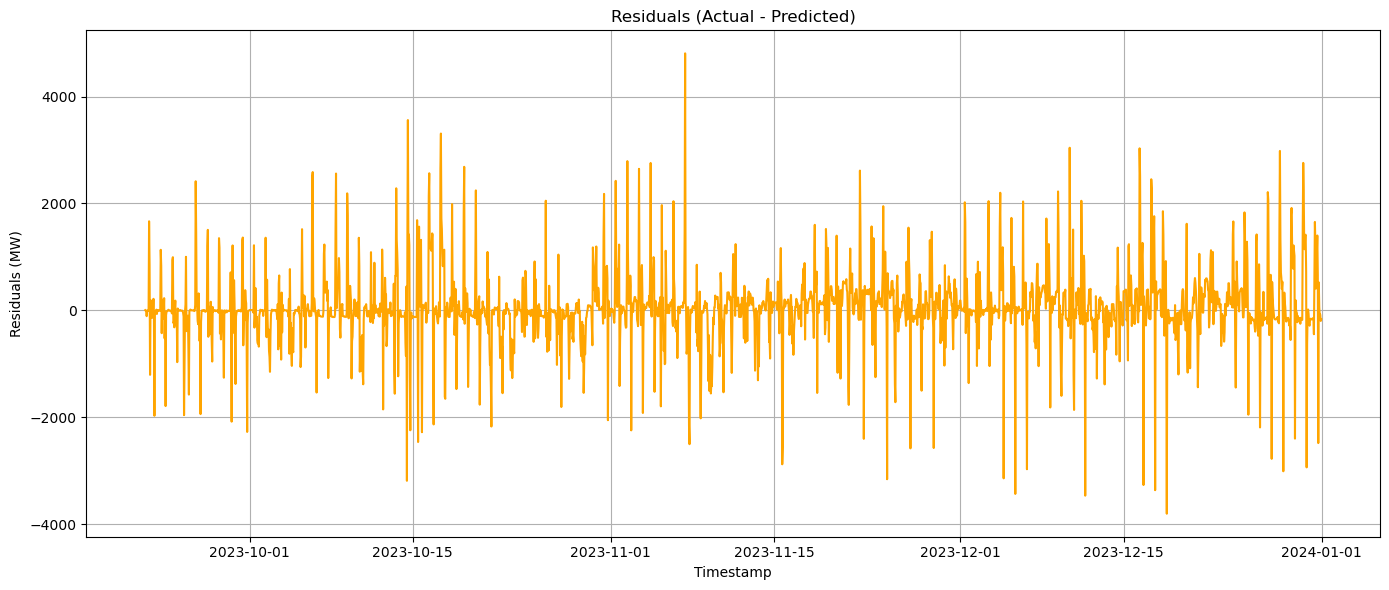

In [496]:
residuals = y_test - preds

plt.figure(figsize=(14, 6))
plt.plot(results["timestamp"], residuals, label="Residuals", color="orange")
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Timestamp")
plt.ylabel("Residuals (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Neural Network**

We will use a fully connected neural network (multi-layer perceptron, or MLP) built with Keras (TensorFlow backend) to predict system-wide solar energy generation based on our engineered features.

In [500]:
# import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Sequential, Dense, and Dropout are used to build the neural network.

StandardScaler is critical because neural networks are sensitive to feature scales.

EarlyStopping helps prevent overfitting by stopping training when the model stops improving.

##### **{Feature Setup (Same as GBR}**

In [534]:
# using the engineered features held in sdf from before
time_features = ["hour", "dayofweek", "month", "is_weekend"]
lag_features = [f"lag_{lag}" for lag in [1, 2, 3, 24, 48, 168]]
rolling_features = ["rolling_mean_6", "rolling_std_6"]
temp_features = ["temp_2m_south", "temp_2m_north", "temp_2m_east", "temp_2m_west"]
load_features = [
    "coast_load", "east_load", "farwest_load", "north_load", "northcentral_load",
    "south_load", "southcentral_load", "west_load", "system_load"
]

features = time_features + lag_features + rolling_features + temp_features + load_features

# Combine features with timestamp before splitting
X = sdf[features].copy()
X["timestamp"] = sdf["timestamp"]
y = sdf["solar_system"]

# Time-aware train/test split (no shuffle!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

**Scale the features -- very important for neural networks.**

Neural networks learn faster and more reliably when input features are scaled (typically mean=0, std=1). We use the training data to fit the scaler and apply it to both sets.

In [537]:
# scale inputs excluding timestamp

# remove timestamp before scaling
X_train_scaled = X_train.drop(columns=["timestamp"])
X_test_scaled = X_test.drop(columns=["timestamp"])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)


##### **{Build the Neural Network}**

In [512]:
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Optional dropout to prevent overfitting
model.add(Dropout(0.2))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (regression = 1 unit, no activation)
model.add(Dense(1))

/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dense(64) means 64 neurons in that layer.

relu is a common activation function that helps the model learn non-linear patterns.

Dropout(0.2) randomly turns off 20% of neurons during training to reduce overfitting.

The output layer uses 1 neuron because we’re predicting a single value (solar output).

##### **{Compile the Model}**

In [517]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',   # common for regression
    metrics=['mean_absolute_error']
)

adam is a great default optimizer.

We use MSE as the loss function (standard for regression) and track MAE too.

##### **{Train the Model}**

In [539]:
model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)

y_pred = model.predict(X_test_scaled).flatten()


Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 370166.3750 - mean_absolute_error: 343.3486 - val_loss: 310911.5000 - val_mean_absolute_error: 326.6086
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 406278.5000 - mean_absolute_error: 351.8445 - val_loss: 286266.2500 - val_mean_absolute_error: 290.6969
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 363985.6875 - mean_absolute_error: 329.7782 - val_loss: 303166.7812 - val_mean_absolute_error: 310.7549
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 395760.2812 - mean_absolute_error: 351.6024 - val_loss: 287212.8125 - val_mean_absolute_error: 300.7209
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 367578.9375 - mean_absolute_error: 332.9587 - val_loss: 331899.9062 - val_mean_absolute_error: 354.6710
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 397576.5000 - mean_absolute_error: 345.5127 - val_loss: 300648.5938 - val_mean_absolute_error: 303.642

validation_split=0.2: keeps 20% of training data for validation.

EarlyStopping: stops training when validation loss stops improving for 10 epochs.

restore_best_weights=True brings back the best model.

##### **{Evaluate the Model}**

In [543]:
y_pred = model.predict(X_test_scaled).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Neural Network Performance:")
print(f"MAE:  {mae:.2f} MW")
print(f"RMSE: {rmse:.2f} MW")
print(f"R²:   {r2:.4f}")

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
Neural Network Performance:
MAE:  505.13 MW
RMSE: 823.59 MW
R²:   0.9653


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


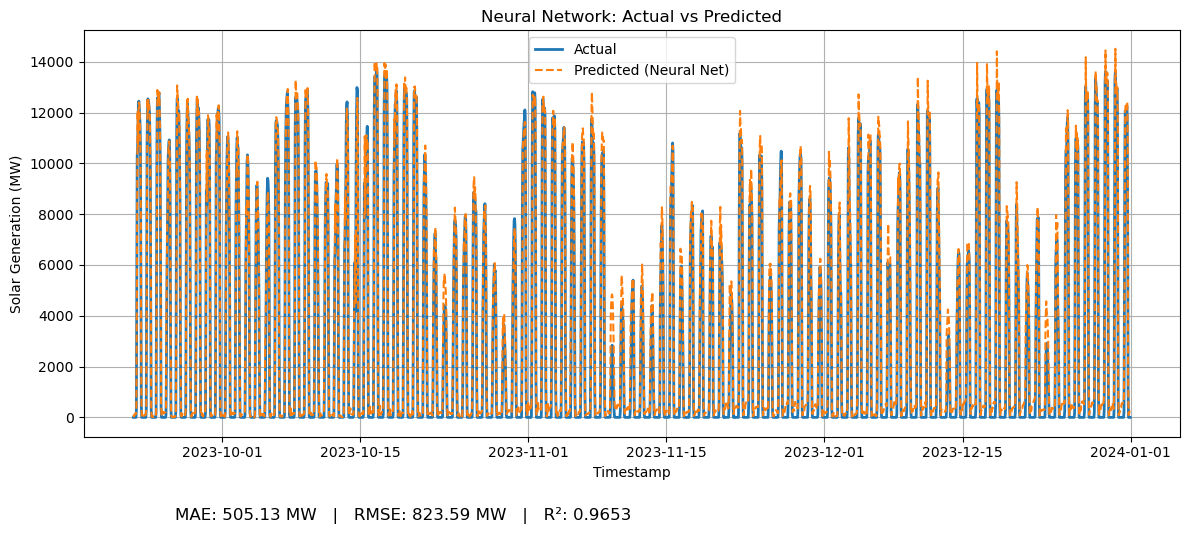

In [545]:
# Use the timestamp stored in X_test
results_nn = pd.DataFrame({
    "timestamp": X_test["timestamp"].values,
    "actual": y_test.values,
    "predicted": y_pred
})

# Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(results_nn["timestamp"], results_nn["actual"], label="Actual", linewidth=2)
plt.plot(results_nn["timestamp"], results_nn["predicted"], label="Predicted (Neural Net)", linestyle='--')
plt.title("Neural Network: Actual vs Predicted")
plt.xlabel("Timestamp")
plt.ylabel("Solar Generation (MW)")
plt.legend()
plt.grid(True)

plt.figtext(0.15, -0.05, f"MAE: {mae:.2f} MW   |   RMSE: {rmse:.2f} MW   |   R²: {r2:.4f}", fontsize=12)

plt.tight_layout()
plt.show()